In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\reehan roshan\anaconda3\lib\site-packages\apache_beam-2.51.0rc1-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\reehan roshan\anaconda3\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\reehan roshan\anaconda3\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\reehan roshan\anaconda3\lib\site-packages\cython-3.0.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\reehan roshan\anaconda3

In [2]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:
data = pd.read_csv("D:/ML/Projects/Linear-Regression/Titanic-Project/data/train.csv")
test_data = pd.read_csv("D:/ML/Projects/Linear-Regression/Titanic-Project/data/test.csv")

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# missing values in the dataset

In [7]:
Total = data.isnull().sum().sort_values(ascending=False)

In [8]:
print(Total)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


# Percentage of Missing values in our dataset features

In [9]:
percent_1 = data.isnull().sum()/data.isnull().count()*100

In [10]:
percent_1

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

In [12]:
percent_2

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64

# Display the Missing data in table

In [13]:
Missing_data_percentage = pd.concat([Total,percent_2] , axis=1,keys=["Total","Percentage"])

In [14]:
Missing_data_percentage.head(5)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Displaying how many womens and mens servived and the age 

C:\Users\reehan roshan\AppData\Local\Temp\ipykernel_18668\1525455809.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(womens[womens['Survived'] == 1].Age.dropna(),bins=18,label = "Survived" ,ax = axes[0], kde =False)
C:\Users\reehan roshan\AppData\Local\Temp\ipykernel_18668\1525455809.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

Text(0.5, 1.0, 'Male-Passengers')

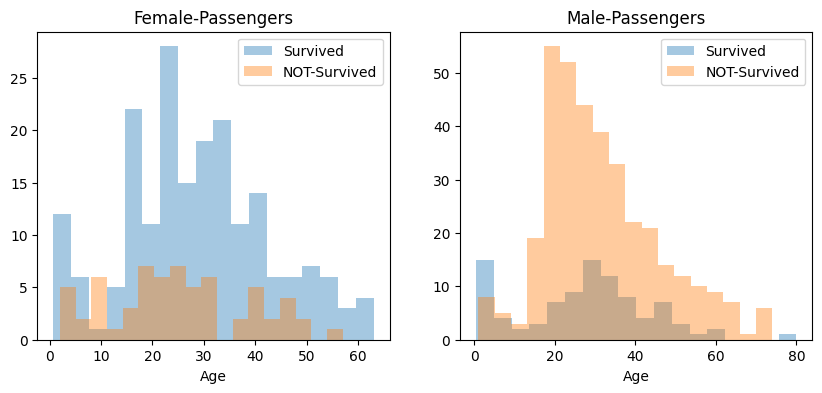

In [16]:
fig , axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

womens = data[data["Sex"] == 'female']
ax = sns.distplot(womens[womens['Survived'] == 1].Age.dropna(),bins=18,label = "Survived" ,ax = axes[0], kde =False)
ax = sns.distplot(womens[womens['Survived'] == 0].Age.dropna(),bins=18,label = "NOT-Survived", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female-Passengers')


males = data[data["Sex"] == 'male']
ax = sns.distplot(males[males['Survived'] == 1].Age.dropna(),bins=18,label = "Survived" ,ax = axes[1], kde =False)
ax = sns.distplot(males[males['Survived'] == 0].Age.dropna(),bins=18,label = "NOT-Survived", ax = axes[1], kde =False)
ax.legend()
ax.set_title('Male-Passengers')

# lets check which passenger class people survived

<Axes: xlabel='Pclass', ylabel='Survived'>

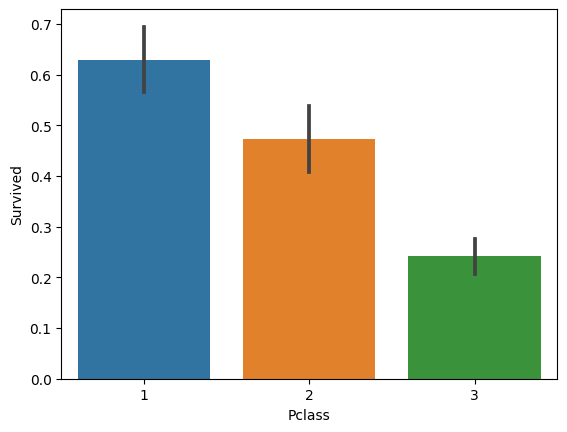

In [17]:
sns.barplot(x='Pclass', y='Survived', data=data)

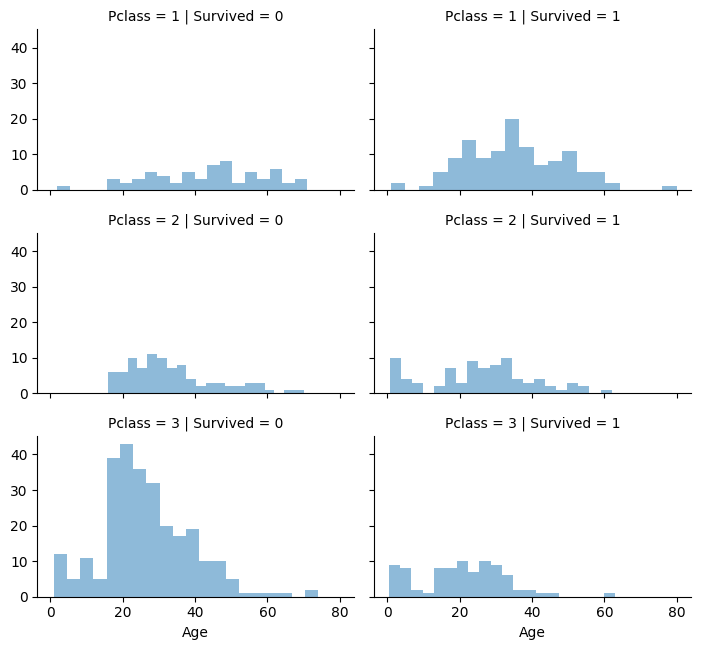

In [18]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# lets count how many people survived and not survived from the overall of the train / test dataset

In [19]:
Total = [data, test_data]

for dataset in Total:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

# Now, you can get the value counts for 'not_alone' for each DataFrame separately
print("Value counts for 'not_alone' in 'train_data':")
print(data['not_alone'].value_counts())

print("\nValue counts for 'not_alone' in 'test_data':")
print(test_data['not_alone'].value_counts())


Value counts for 'not_alone' in 'train_data':
1    537
0    354
Name: not_alone, dtype: int64

Value counts for 'not_alone' in 'test_data':
1    253
0    165
Name: not_alone, dtype: int64


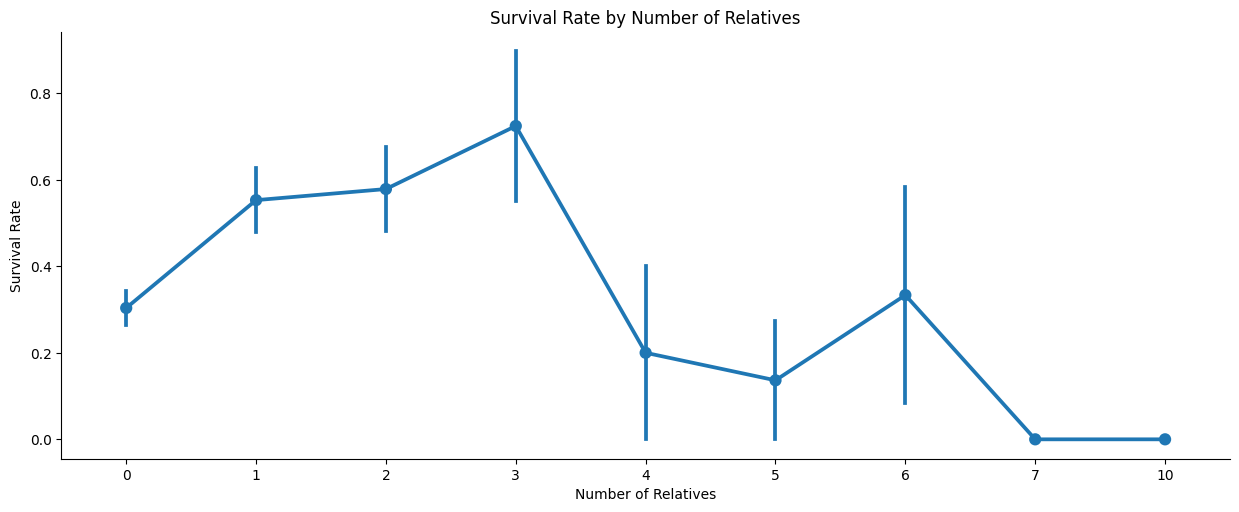

In [20]:
g = sns.catplot(x='relatives', y='Survived', data=data, aspect=2.5, kind='point')

plt.title('Survival Rate by Number of Relatives')
plt.xlabel('Number of Relatives')
plt.ylabel('Survival Rate')
plt.show()


In [21]:
# dropping the passengerId from the train-dataset

In [22]:
data = data.drop(['PassengerId'],axis=1)

In [23]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [24]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [25]:
deck = {
    "A":1,
    "B":2,
    "C":3,
    "D":4,
    "E":5,
    "F":6,
    "G":7,
    "U":8,
}


Total = [data,test_data]

for dataset in Total:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    

In [26]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U0,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U0,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,3


In [27]:
data = data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

# now filling some random values to the "Age" columns

In [28]:
Total = [data, test_data]

for dataset in Total:
    mean = data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = nd.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[nd.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data["Age"].astype(int)


# now filling the common value in Embarked column

In [29]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [30]:
common_alpha = "S"


Total = [data,test_data]

for dataset in Total:
    dataset['Embarked'] =  dataset['Embarked'].fillna(common_alpha)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


# Convert NAME , SEX , FARE , EMBARKED --- THESE ALL TO OBJECT,FLOAT TO INT

# Converting the  Fare from float64 to int

In [32]:
Total = [data,test_data]

for dataset in Total:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [33]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23,1,2,W./C. 6607,23,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C,0,1,3


# Converting the NAME(OBJECT) TO INT 

In [34]:
Total = [data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in Total:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)


In [35]:
data = data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [36]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,211536,13,S,0,1,8,5
887,1,1,female,19,0,0,112053,30,S,0,1,2,2
888,0,3,female,23,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,male,26,0,0,111369,30,C,0,1,3,1


# Convert the Gender[OBJECT] --- to INT 

In [37]:
genders = {
    "female":1,
    "male":0
}

Total = [data, test_data]

for dataset in Total:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [38]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,211536,13,S,0,1,8,5
887,1,1,1,19,0,0,112053,30,S,0,1,2,2
888,0,3,1,23,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,0,26,0,0,111369,30,C,0,1,3,1


# Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [39]:
data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [40]:
data = data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [41]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,0,8,1
1,1,1,1,38,1,0,71,C,1,0,3,3
2,1,3,1,26,0,0,7,S,0,1,8,2
3,1,1,1,35,1,0,53,S,1,0,3,3
4,0,3,0,35,0,0,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,S,0,1,8,5
887,1,1,1,19,0,0,30,S,0,1,2,2
888,0,3,1,23,1,2,23,S,3,0,8,2
889,1,1,0,26,0,0,30,C,0,1,3,1


# Embarked:
#Convert ‘Embarked’ feature into numeric.

In [42]:
ports = {"S": 0, "C": 1, "Q": 2}
Total = [data, test_data]

for dataset in Total:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [43]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1
1,1,1,1,38,1,0,71,1,1,0,3,3
2,1,3,1,26,0,0,7,0,0,1,8,2
3,1,1,1,35,1,0,53,0,1,0,3,3
4,0,3,0,35,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1,8,5
887,1,1,1,19,0,0,30,0,0,1,2,2
888,0,3,1,23,1,2,23,0,3,0,8,2
889,1,1,0,26,0,0,30,1,0,1,3,1


# conver the age from float to int

In [44]:
Total = [data, test_data]
for dataset in Total:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [45]:
data['Age'].value_counts()

4    177
6    159
3    136
5    132
2    119
1    100
0     68
Name: Age, dtype: int64

In [46]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,1,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [47]:
Total = [data, test_data]

for dataset in Total:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

#Fare:
#For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature.

In [48]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5
887,1,1,1,2,0,0,2,0,0,1,2,2
888,0,3,1,3,1,2,2,0,3,0,8,2
889,1,1,0,3,0,0,2,1,0,1,3,1


# gonna add two columns  Age times Class

In [49]:
Total = [data, test_data]
for dataset in Total:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [50]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6
887,1,1,1,2,0,0,2,0,0,1,2,2,2
888,0,3,1,3,1,2,2,0,3,0,8,2,9
889,1,1,0,3,0,0,2,1,0,1,3,1,3


# 2. column added " Fare per Person"

In [51]:
Total = [data, test_data]

for dataset in Total:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [52]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6,1
887,1,1,1,2,0,0,2,0,0,1,2,2,2,2
888,0,3,1,3,1,2,2,0,3,0,8,2,9,0
889,1,1,0,3,0,0,2,1,0,1,3,1,3,2


In [53]:
X_train = data.drop("Survived", axis=1)
Y_train = data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

# Model - 1 -- Stochastic Gradient Descent (SGD):

In [77]:
model1 = linear_model.SGDClassifier(max_iter=5, tol=None)
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

model1.score(X_train, Y_train)

acc_sgd = round(model1.score(X_train, Y_train) * 100, 2)
print("Model 1 -Stochastic Gradient Descent {}".format(acc_sgd))

Model 1 -Stochastic Gradient Descent 49.72


# Model - 2 --- Random Forest:

In [80]:
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, Y_train)

Y_prediction = model2.predict(X_test)

model2.score(X_train, Y_train)
acc_random_forest = round(model2.score(X_train, Y_train) * 100, 2)
print("Model 2 - RandomForest {}".format(acc_random_forest))

Model 2 - RandomForest 93.04


In [81]:
data.to_csv('processed_data.csv',index=False)

In [82]:

Y_prediction = model2.predict(X_test)

print("what sorts of people were more likely to survive?", Y_prediction)


what sorts of people were more likely to survive? [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 0 1]


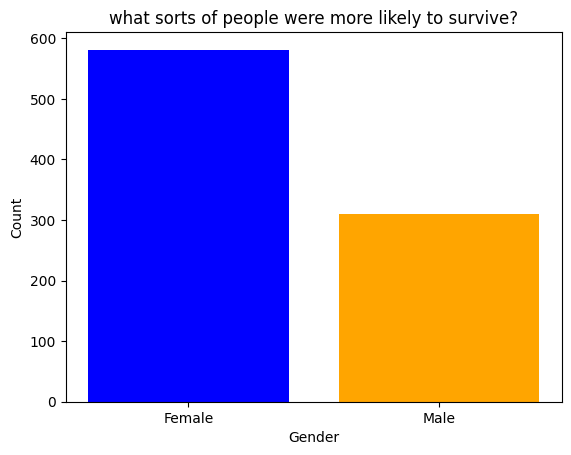

In [87]:

data = pd.read_csv('D:/ML/Projects/Linear-Regression/Titanic-Project/processed_data.csv')

features = data.drop("Survived", axis=1)


predicted_survival = model2.predict(features)

gender_labels = ['Female', 'Male']
survival_counts = [sum(predicted_survival == 0), sum(predicted_survival == 1)]

# Create a bar chart
plt.bar(gender_labels, survival_counts, color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("what sorts of people were more likely to survive?")
plt.show()


In [90]:
import pandas as pd
import numpy as np

# Assuming predicted_survival contains the predicted survival outcomes for 418 entries
# Ensure predicted_survival has exactly 418 elements
predicted_survival = np.random.randint(0, 2, 418)  # Replace this with your actual predicted survival outcomes

# Generate PassengerId (starting from 892) for 418 entries
passenger_ids = np.arange(892, 1310)  # Adjust the starting value and range as needed

# Ensure both arrays have the same length
assert len(passenger_ids) == len(predicted_survival), "Arrays must have the same length"

# Create a DataFrame with PassengerId and Survived columns
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predicted_survival})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

